In [ ]:
import sys
if "google.colab" in sys.modules:

  def download_from_web(url):
    import requests

    response = requests.get(url)
    if response.status_code == 200:
      with open(url.split("/")[-1], "wb") as file:
        file.write(response.content)
    else:
      raise Exception(
          f"Failed to download the image. Status code: {response.status_code}"
      )

In [ ]:
download_from_web (
    "https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_02a_basic_image_processing/Unequalized_Hawkes_Bay_NZ.jpg"
)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

figsize = (10, 10)

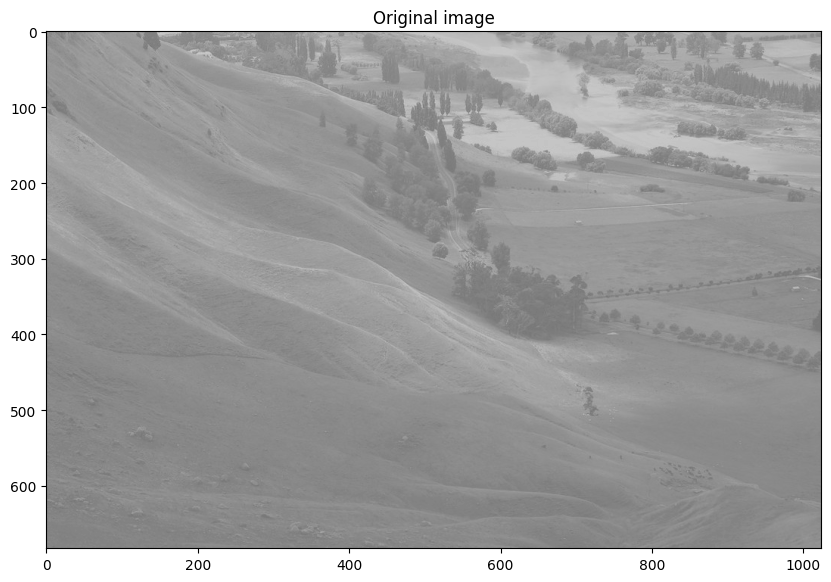

In [ ]:
I = cv2.imread("Unequalized_Hawkes_Bay_NZ.jpg", 0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()

In [ ]:
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(I, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

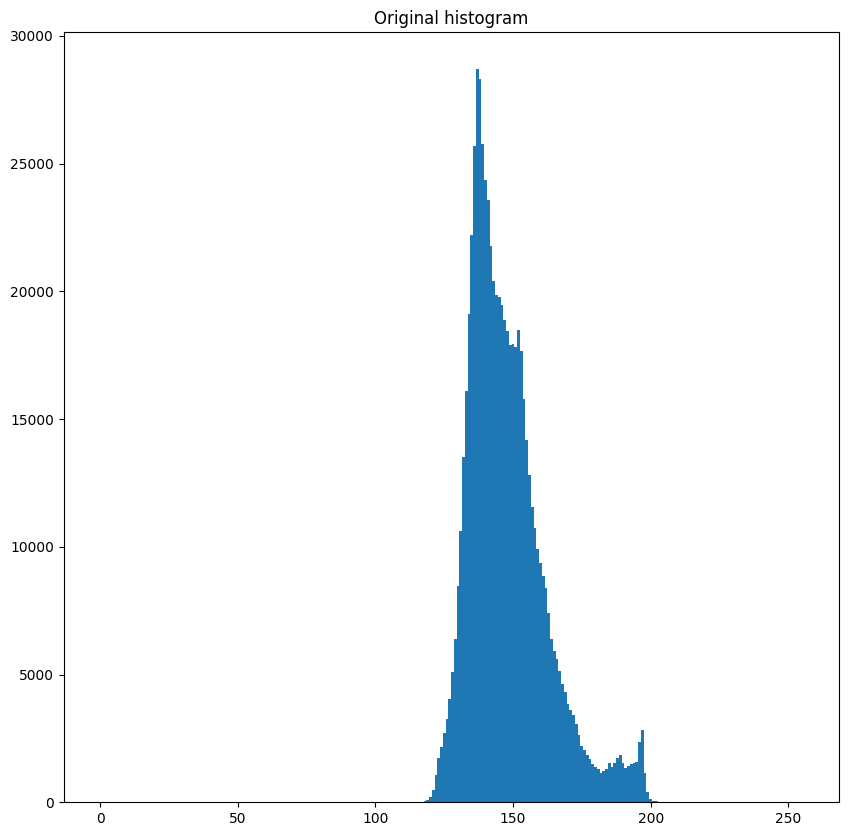

In [ ]:
def draw_hist(x_axis,input):
  fig,ax = plt.subplots(figsize=figsize)
  plt.bar(x_axis,input,width=input.shape[0] / (x_axis[-1]-x_axis[0]+1))
  return fig, ax

draw_hist(bins_start,bin_count)
plt.title("Original histogram")
plt.show()

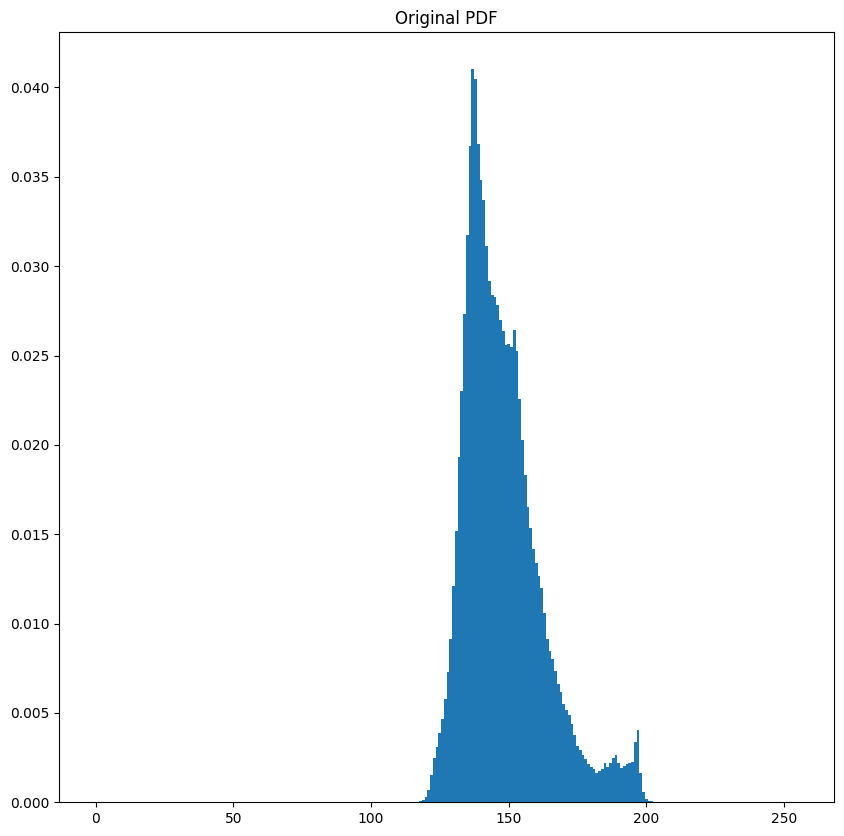

In [ ]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("Original PDF")
plt.show()

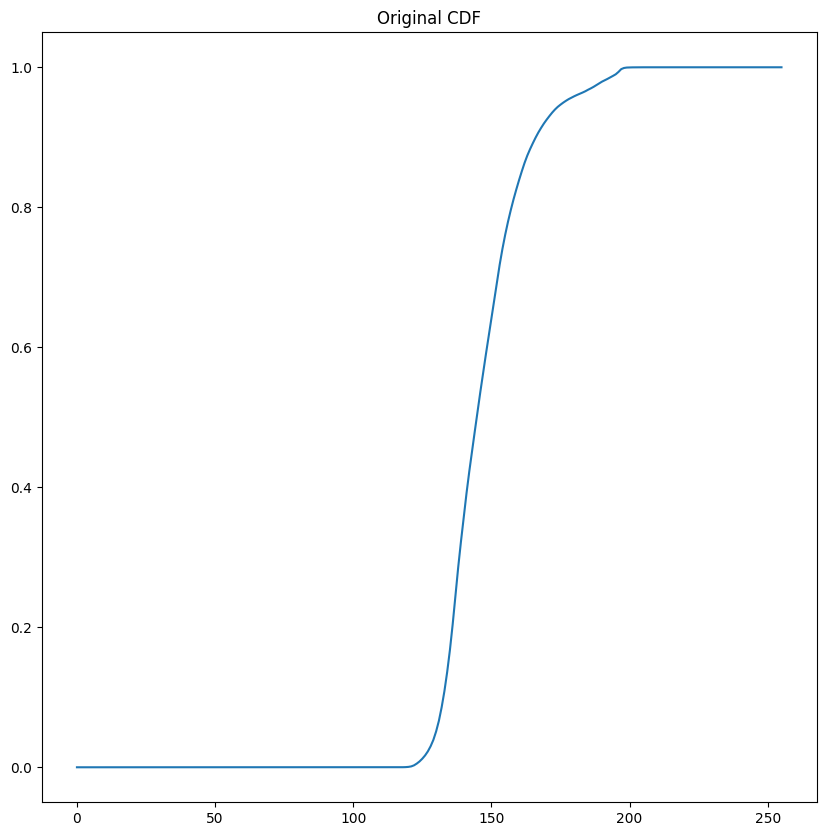

In [ ]:
cdf = np.cumsum(pdf)
plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()

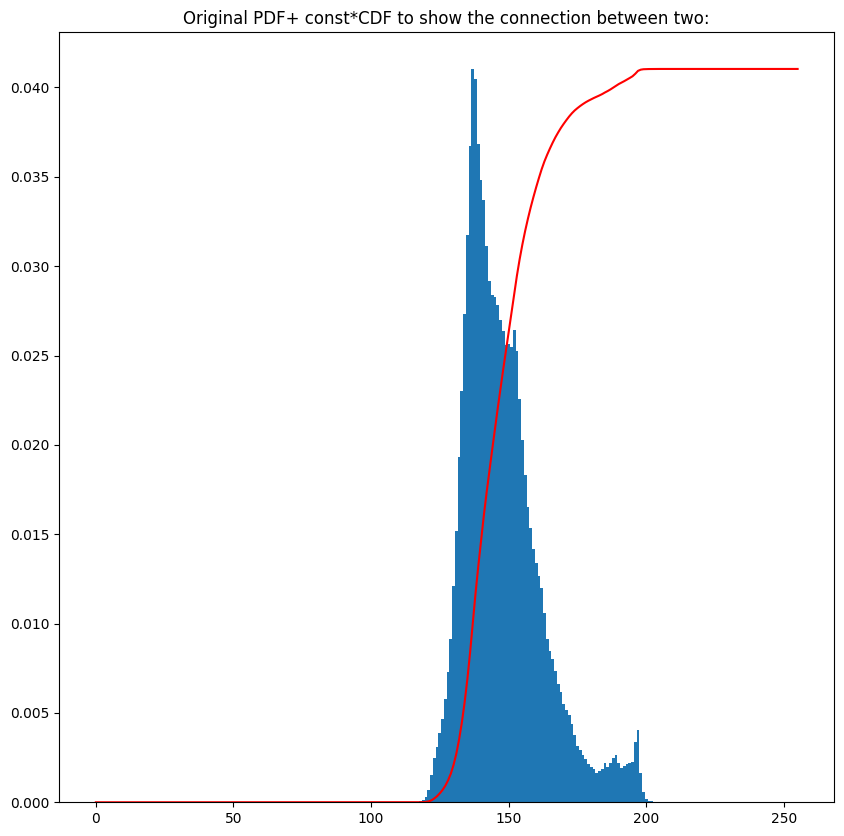

In [ ]:
fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF to show the connection between two:")
plt.show()

In [ ]:
f_eq = np.round(cdf * 255).astype(int)

f_eq

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   1,   2,   3,   4,   6,   8,  10,
        13,  17,  22,  28,  35,  43,  52,  63,  73,  82,  91, 100, 108,
       115, 122, 130, 137, 144, 150, 157, 163, 170, 177, 183, 189, 194,
       199, 203, 207, 210, 214, 217, 220, 223, 225, 227, 229, 231, 233,
       235, 236, 237, 238, 240, 241, 241, 242, 243, 243, 244, 24

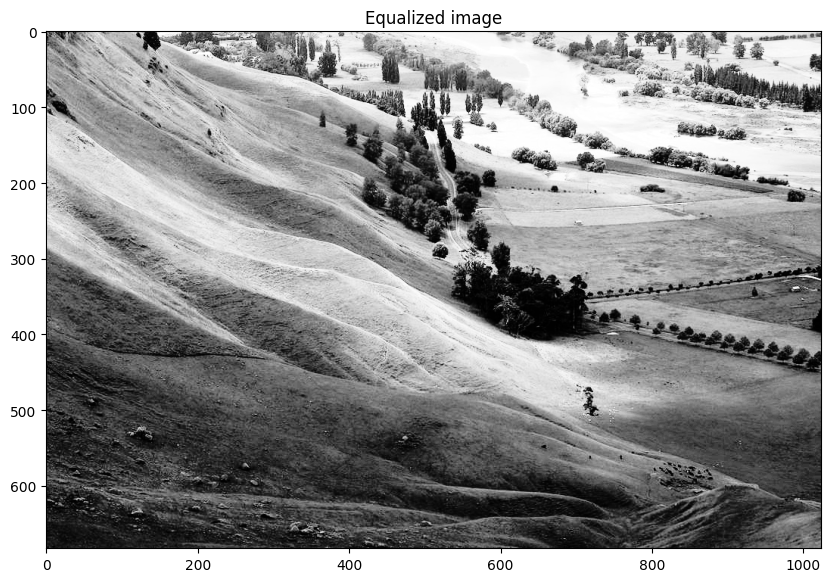

In [ ]:
I_eq = f_eq[I]
plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap="gray", vmin=0, vmax=255)
plt.title("Equalized image")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

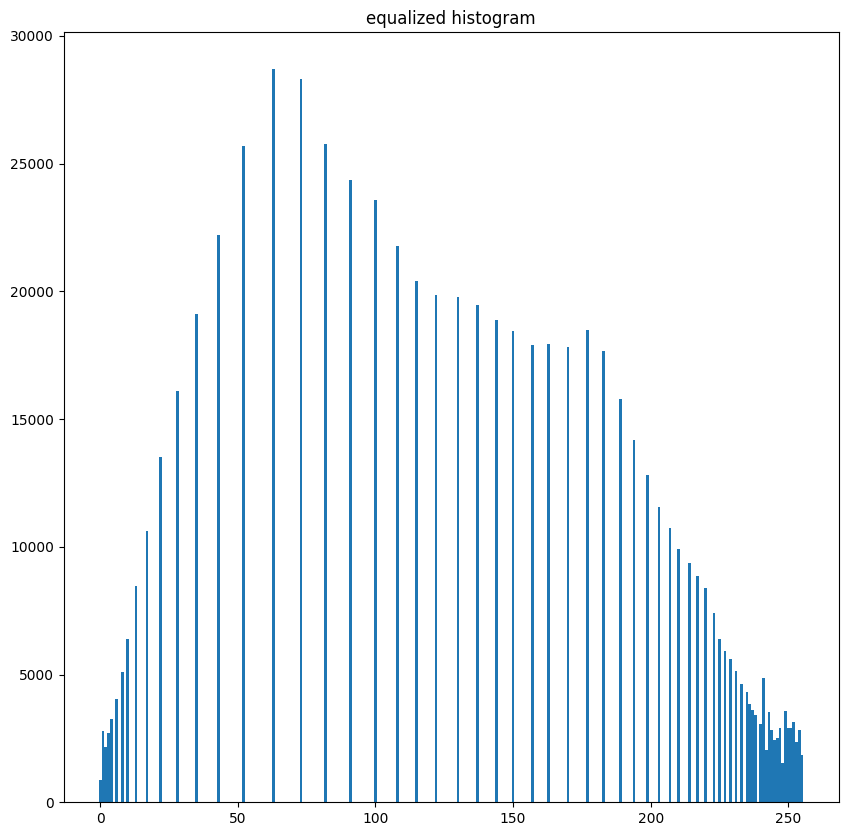

In [ ]:
bin_count, bins_edges = np.histogram(I_eq, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]
draw_hist(bins_start, bin_count)
plt.title('equalized histogram')
plt.show

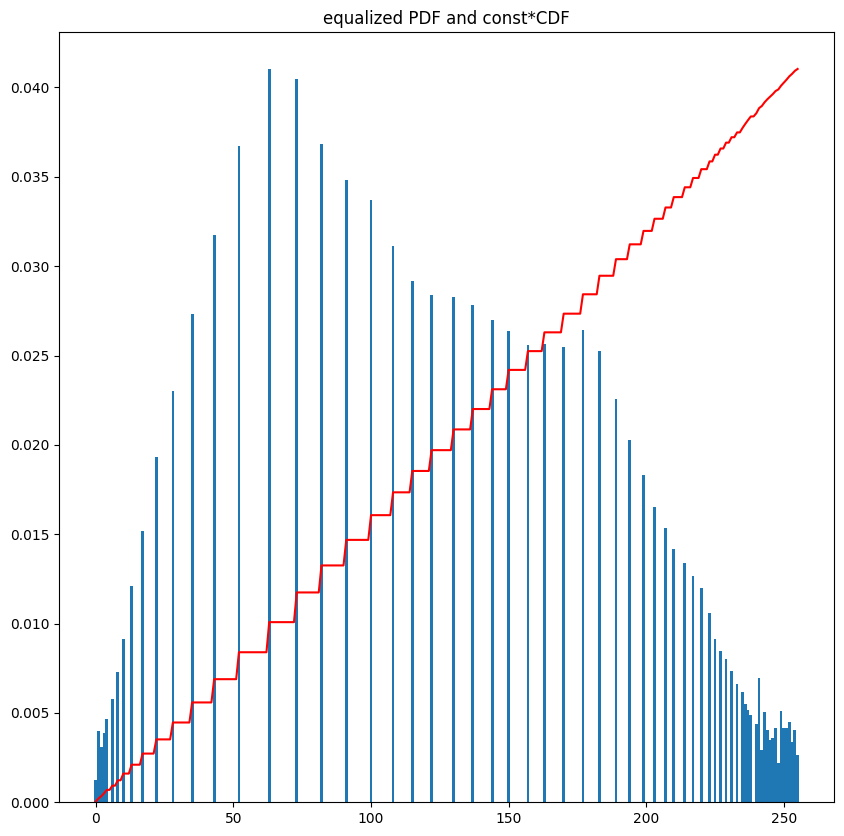

In [ ]:
pdf = bin_count / np.sum(bin_count)
cdf = np.cumsum(pdf)

fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("equalized PDF and const*CDF")
plt.show()